**Predicting Suicide Risk Factors among Veterans: U.S. State-Level Veterans DataSet (2005–2011)**

Intended or committed suicide remains one of the most serious public health concern affecting United States (US) veterans. According to the U.S. Department of Veterans Affairs (VA), an average of 17 veterans die by suicide every day, proving that veterans have significantly higher rates of death compared to the general population [1]. This is somehow expected since veterans experience deployment and combat exposure causing psychological and physical trauma, chronic health conditions, loneliness, and barriers to accessibf mental health and trauma care, which can all contribute to elevated suicide risk.

A state-level data was collected between 2005 and 2011 by News21 to capture critical risk factors like the number of veterans, veteran suicides, total population, and general suicide counts across all 50 states. This data provides a unique opportunity to researchers to examine quantifiable factors at the population level to predict the proportion of veterans died by suicide at state level, which is important since determining these risk factors can inform early prevention techniques and guide policy makers allocate mental health resources to veterans.

With this project, I wanted to apply supervised machine learning methods to predict the veteran suicide rate (vet_suicides_p) based on features like veteran population, total suicides, and general demographic indicators. As a researcher interested in health and well-being outcomes of veterans, I hope to find some meaningful results rha may contribute to the development of evidence-driven tools for identifying states with heightened risk and informing public health policy interventions. To achieve this, I had the following research questions:

How do sociodemographic variables relate to veteran suicide rates?
Can we predict veteran suicide rates using supervised learning models?
Which risk factors and features are most important in identifying increased suicide risk among veterans at the state level?
This work aligns with my previous research published in a peer-reviewed journal and aims to improve suicide rates among veterans.

Thanks for reading.

**References**

**1.** U.S. Department of Veterans Affairs. (2023). 2023 National Veteran Suicide Prevention Annual Report. Retrieved from https://www.mentalhealth.va.gov/suicide_prevention/data.asp

**2.** U.S. Department of Veterans Affairs. (2018). National Strategy for Preventing Veteran Suicide 2018–2028. https://www.mentalhealth.va.gov/suicide_prevention/docs/Office-of-Mental-Health-and-Suicide-Prevention-National-Strategy-for-Preventing-Veteran-Suicide.pdf

**3.** The White House. (2019). The President’s Roadmap to Empower Veterans and End a National Tragedy of Suicide (PREVENTS). https://www.va.gov/PREVENTS/

**Important Disclaimer:** This work was developed as part of an academic course assignment and is intended solely for educational and demonstration purposes. The analysis, predictions, and interpretations presented here are based on publicly available data and may contain inaccuracies, simplifications, and errors. The results do not represent clinical, policy, or governmental recommendations. The dataset used in this project—“US Veteran Suicides” (2005–2011)—was obtained from Kaggle, which in turn sourced the data from News21, an investigative journalism initiative. The original source of the data is: News21 (2013). “Back Home: The Challenges Facing Post-9/11 Veterans.” Retrieved from https://backhome.news21.com/interactive/suicide-interactive/. I used data to practice course assignment requirements like data formatting and data cleaning for machine learning purposes. The author of this project does not claim responsibility for any decisions made based on the findings herein.

In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-veteran-suicides/2011.csv
/kaggle/input/us-veteran-suicides/2008.csv
/kaggle/input/us-veteran-suicides/2009.csv
/kaggle/input/us-veteran-suicides/2006.csv
/kaggle/input/us-veteran-suicides/2010.csv
/kaggle/input/us-veteran-suicides/2005.csv
/kaggle/input/us-veteran-suicides/2007.csv


In [21]:
#Phase 1: Exploratory and Data Cleaning

#1a: Data Merging 
data_dir = "/kaggle/input/us-veteran-suicides"

all_files = sorted([f for f in os.listdir(data_dir) if f.endswith('.csv')])

for file in all_files:
    df = pd.read_csv(os.path.join(data_dir, file))
    df["Year"] = int(file.split(".")[0])  # Extract year from filename
    all_data.append(df)

data = pd.concat(all_data, ignore_index=True)

In [24]:
#1b: Inspecting Data Regarding Merging
print("Dataset shape:", data.shape)
print("First few rows:\n", data.head())
print("Unique years:\n", data["Year"].unique())
import warnings

Dataset shape: (1050, 30)
First few rows:
    Unnamed: 0       state  vet_pop  overall_pop_18  vet_pop_p  vet_suicides  \
0           0     Alabama   403950         3344721   0.120772           135   
1           1      Alaska    74482          446969   0.166638            24   
2           2     Arizona   538880         4238996   0.127124           225   
3           3    Arkansas   259304         2023819   0.128126            81   
4           4  California  2193336        25543447   0.085867           633   

   all_suicides  vet_suicides_p  vet_males  vet_males_p  ...  vet_35-54  \
0           535        0.252336        NaN     0.000000  ...        NaN   
1           131        0.183206       22.0     0.916667  ...        NaN   
2           945        0.238095        NaN     0.000000  ...        NaN   
3           400        0.202500       79.0     0.975309  ...        NaN   
4          3206        0.197442      613.0     0.968404  ...        NaN   

   vet_45_54  vet_50_59  vet_45

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


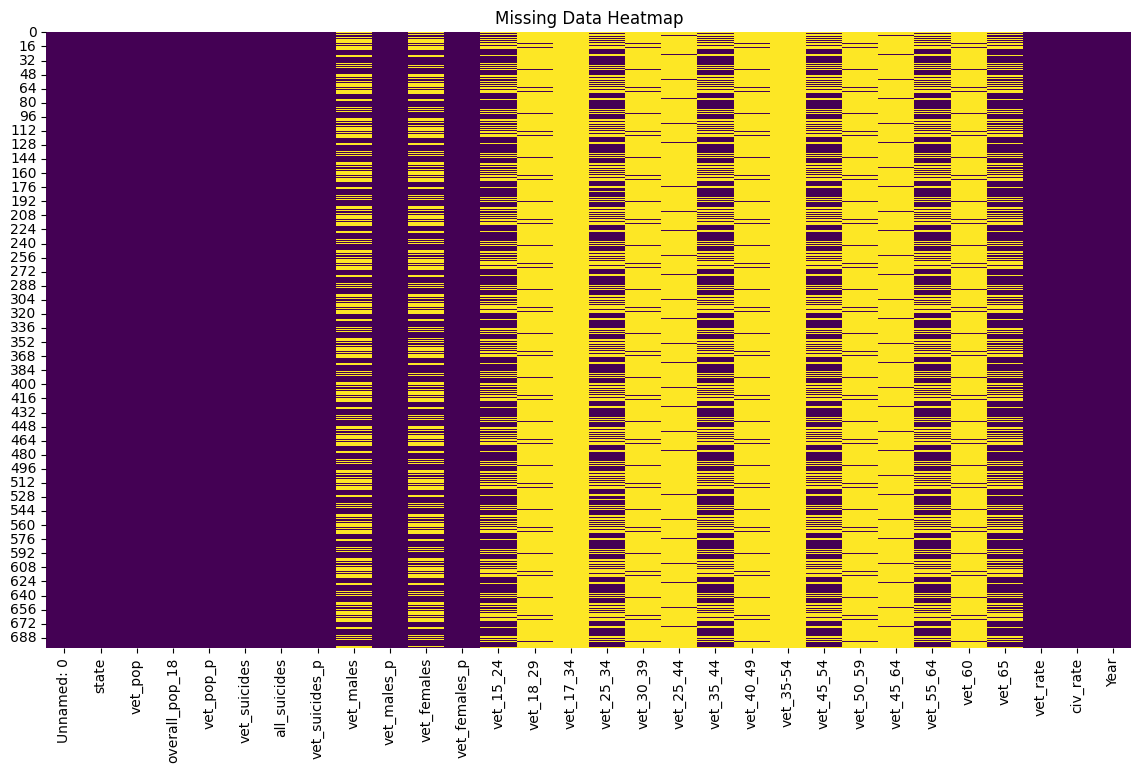

Columns with missing values:
 vet_17_34      686
vet_35-54      674
vet_25_44      672
vet_45_64      672
vet_50_59      658
vet_60         658
vet_18_29      658
vet_30_39      658
vet_40_49      658
vet_45_54      288
vet_35_44      284
vet_25_34      274
vet_males      266
vet_females    262
vet_55_64      262
vet_15_24      246
vet_65         232
dtype: int64


In [12]:
#1c: Missing Data
import matplotlib.pyplot as plt
import seaborn as sns

##1c1. missing data findings
plt.figure(figsize=(14, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

##1c2. columns with missing data
missing = data.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

##1c3. columns with missing values visual
print("Columns with missing values:\n", missing)

In [18]:
#1c Continue: 
##Missing data reduction by using %50 percent missing data
threshold = 0.5
missing_ratio = data.isnull().mean()
columns_to_drop = missing_ratio[missing_ratio > threshold].index.tolist()

print("Dropping these columns due to high missing rate:\n", columns_to_drop)
nomissing_Data = data.drop(columns=columns_to_drop)

#1c4: Replace infinite values with NaN
nomissing_Data.replace([np.inf, -np.inf], np.nan, inplace=True)

#1c5: Impute remaining missing numeric values with median
nomissing_Data.fillna(nomissing_Data.median(numeric_only=True), inplace=True)

#1c6: Confirming values
print("\nRemaining missing values (should be 0):\n", nomissing_Data.isnull().sum().sum())

Dropping these columns due to high missing rate:
 ['vet_18_29', 'vet_17_34', 'vet_30_39', 'vet_25_44', 'vet_40_49', 'vet_35-54', 'vet_50_59', 'vet_45_64', 'vet_60']

Remaining missing values (should be 0):
 0


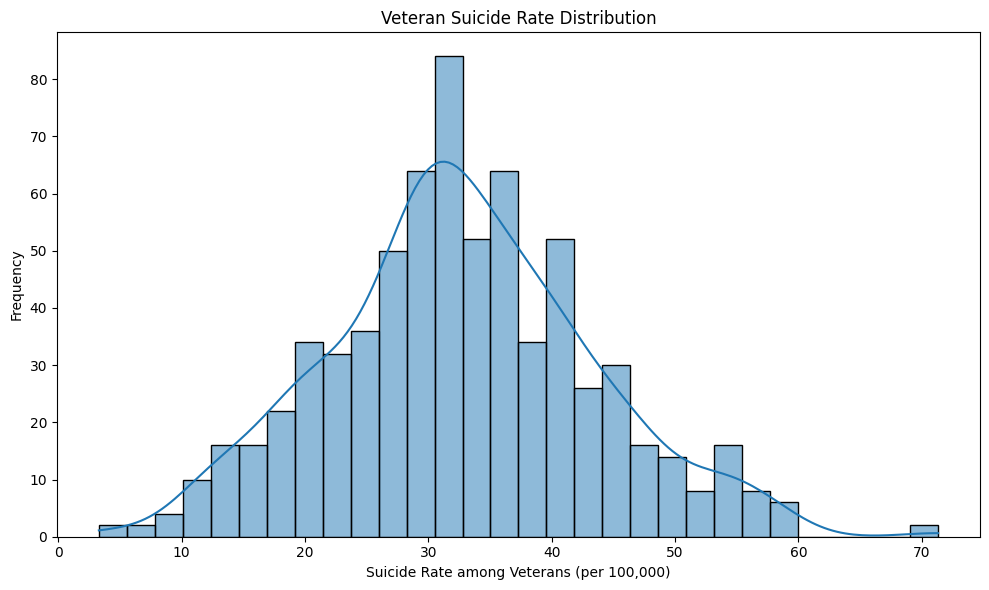

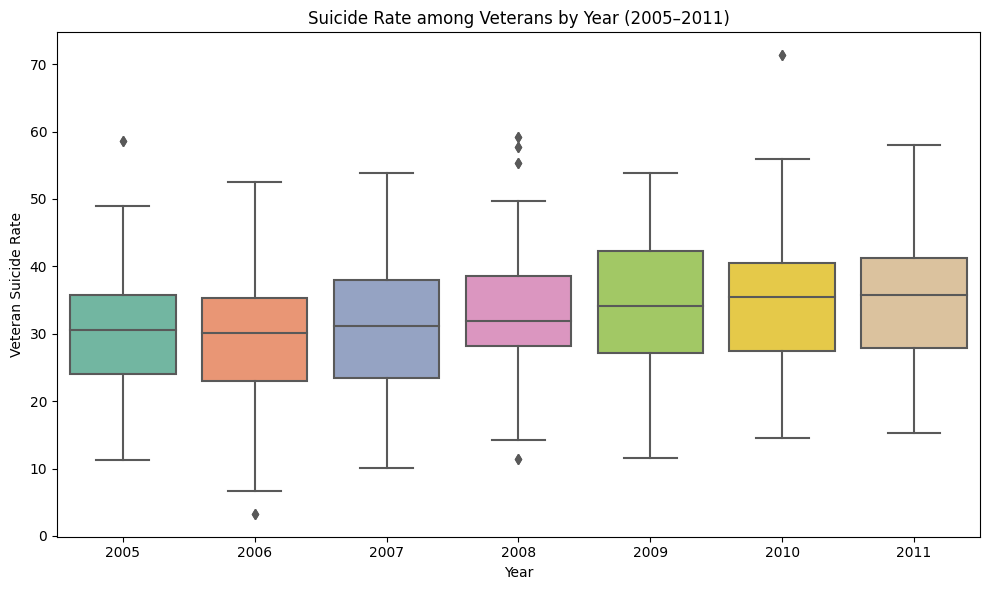

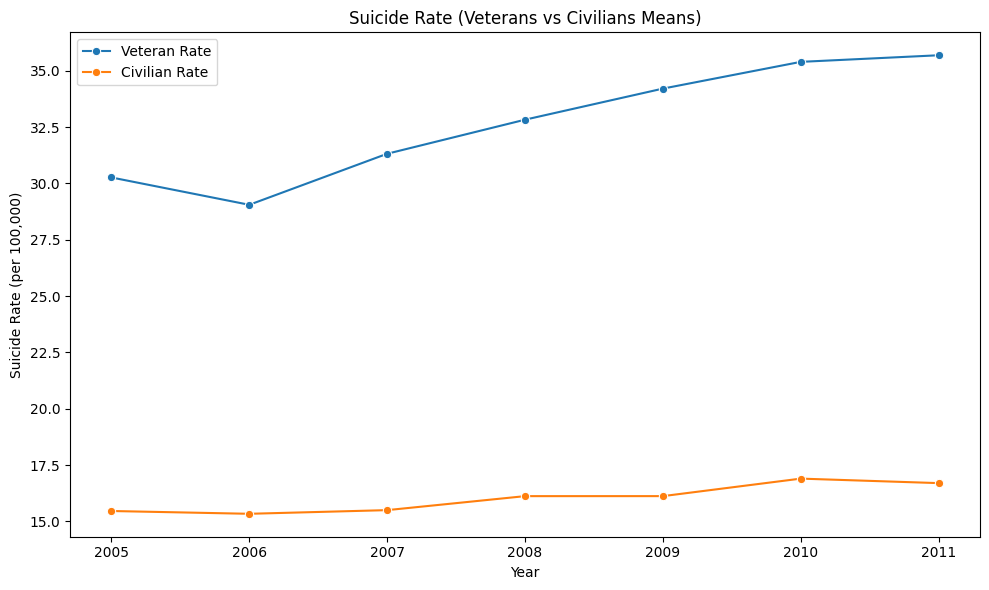

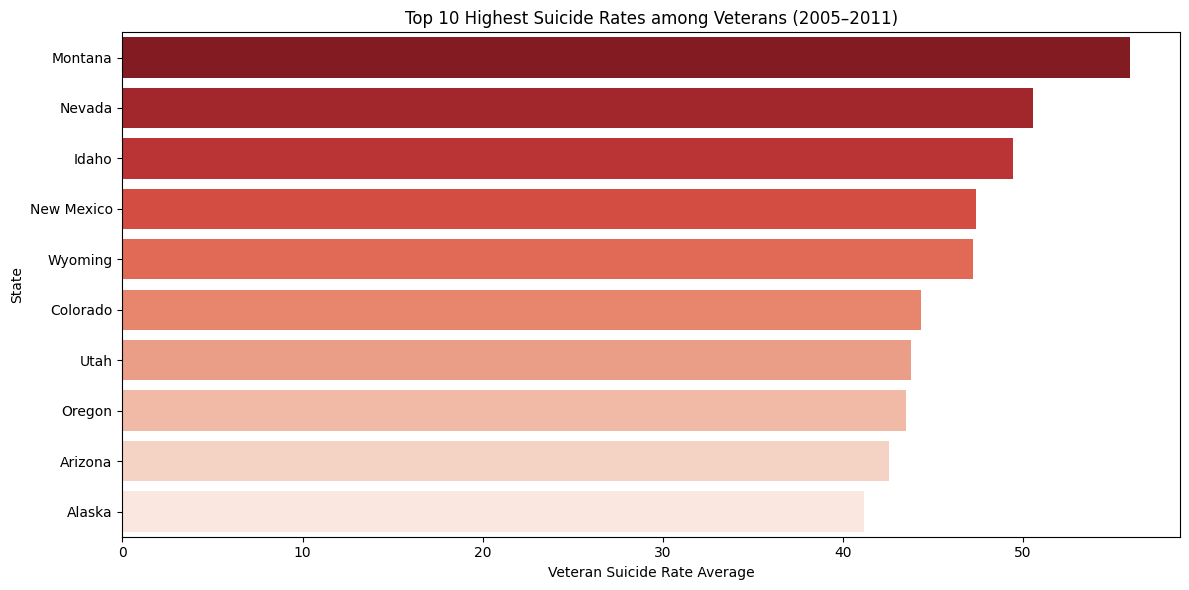

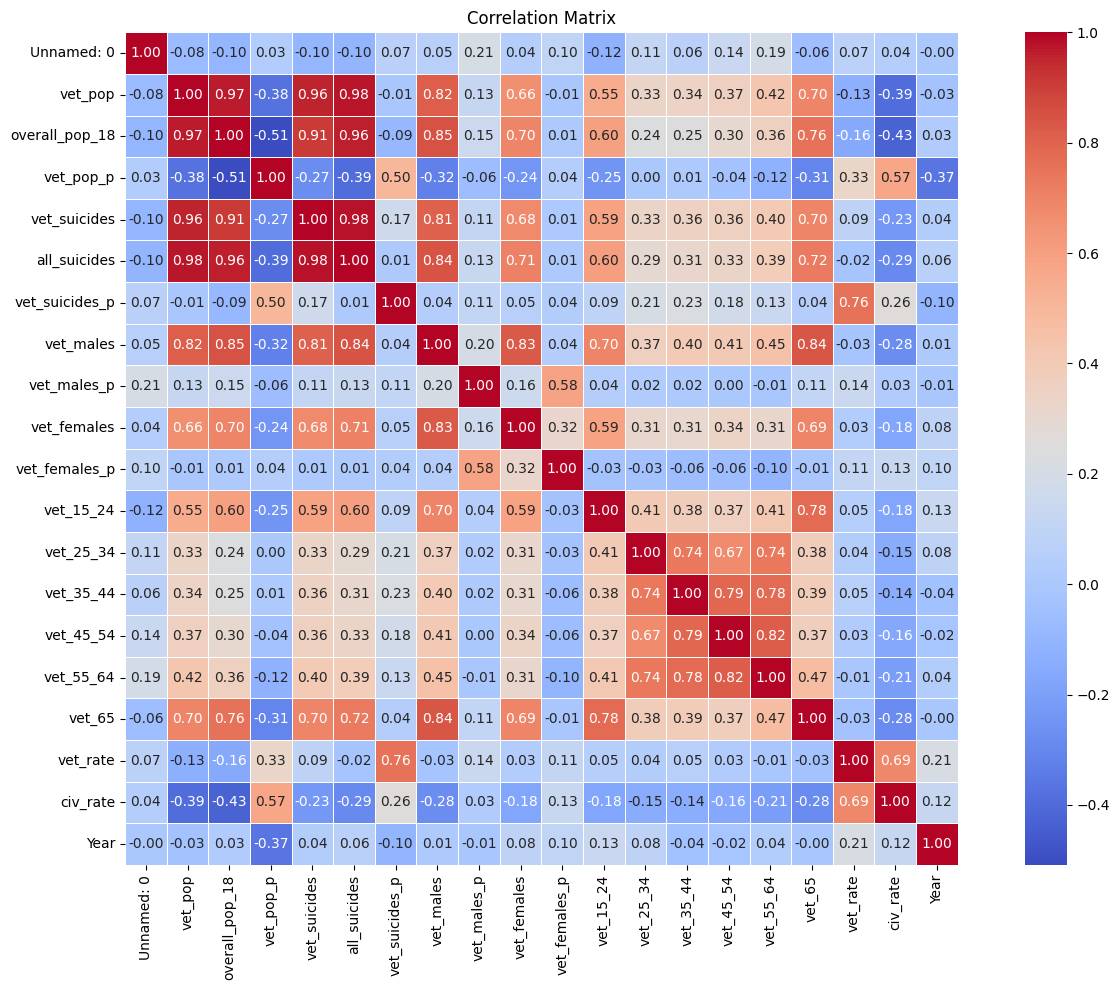

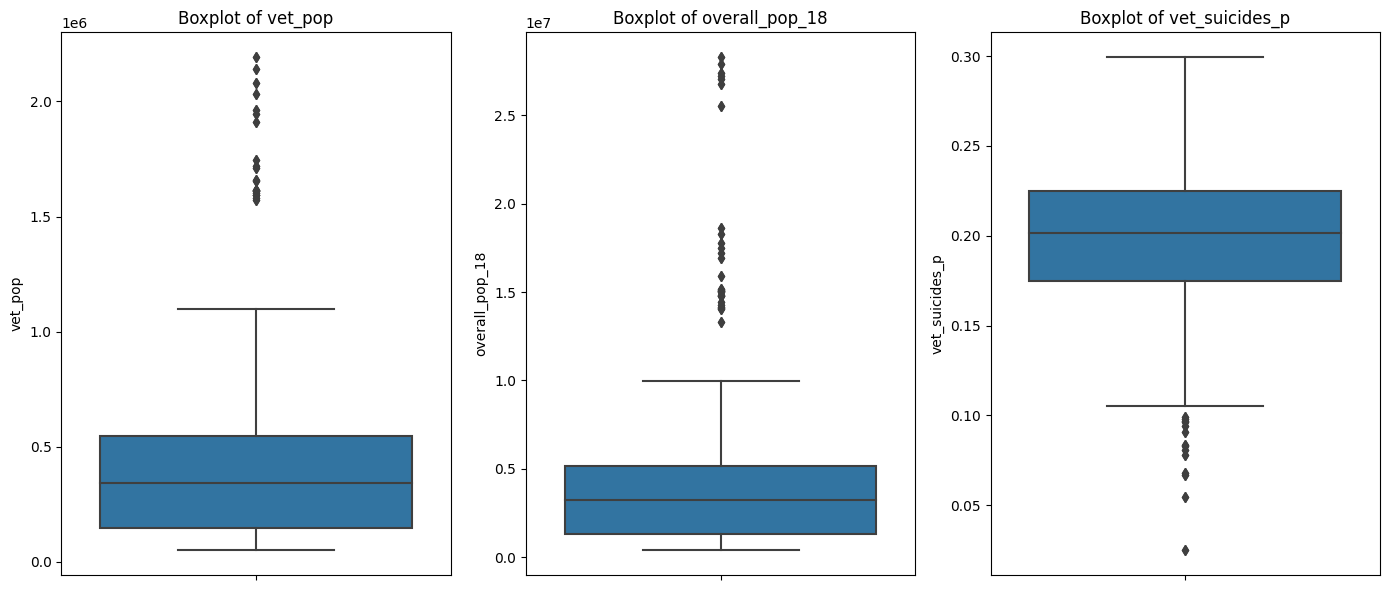

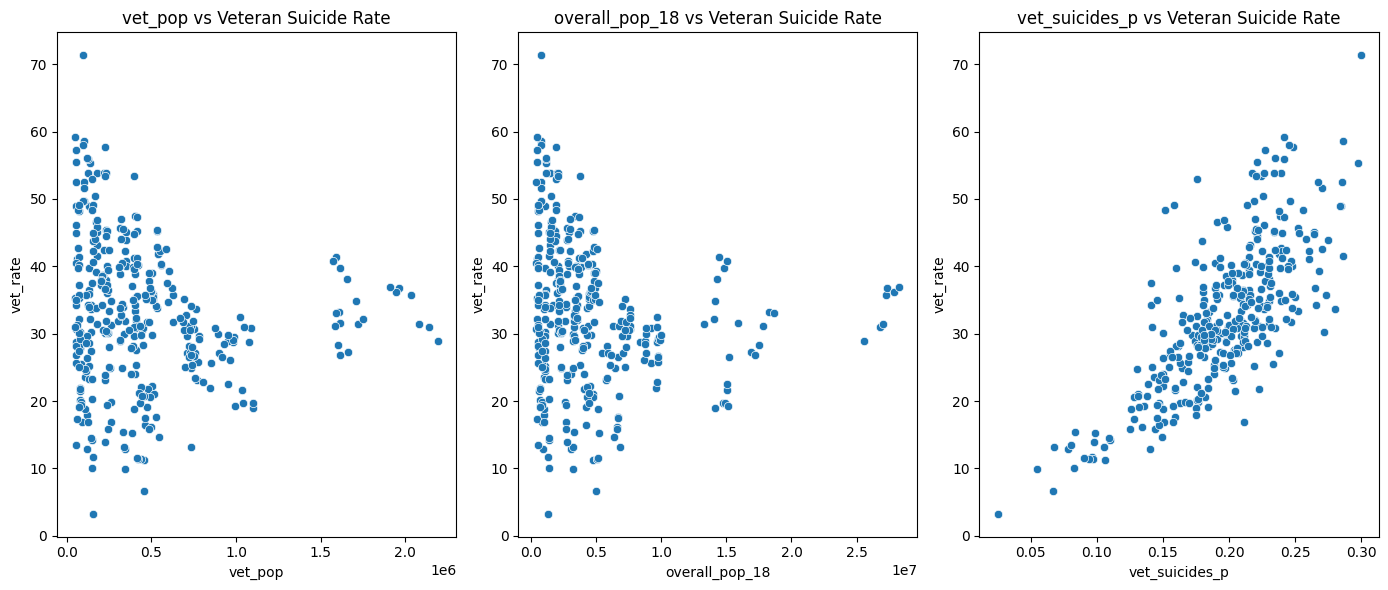

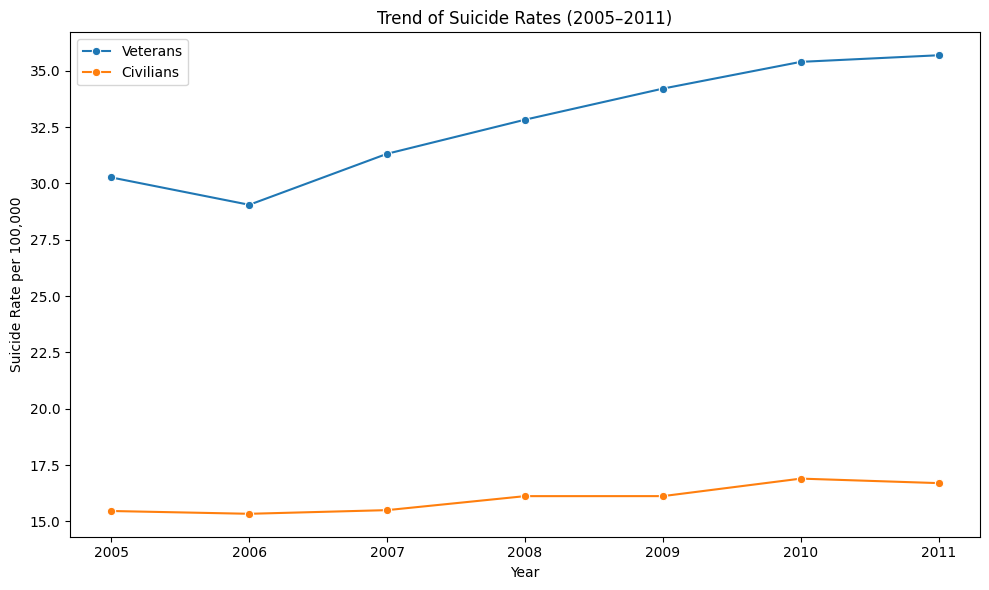

In [68]:
#1d: Exloratory Analyses, Data Descriptives, and Visualizations
#1d1. Distribution Suicide Rate - Veterans
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=FutureWarning)
plt.figure(figsize=(10, 6))
sns.histplot(nomissing_Data["vet_rate"], bins=30, kde=True)
plt.title("Veteran Suicide Rate Distribution")
plt.xlabel("Suicide Rate among Veterans (per 100,000)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

#1d2. Suicide Rate via Year (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=nomissing_Data, x="Year", y="vet_rate", palette="Set2")
plt.title("Suicide Rate among Veterans by Year (2005–2011)")
plt.xlabel("Year")
plt.ylabel("Veteran Suicide Rate")
plt.tight_layout()
plt.show()

#1d3. Suicide Rate Comparison among Civilians and Veterans (Mean Line Plot)
summary = nomissing_Data.groupby("Year")[["vet_rate", "civ_rate"]].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=summary, x="Year", y="vet_rate", label="Veteran Rate", marker="o")
sns.lineplot(data=summary, x="Year", y="civ_rate", label="Civilian Rate", marker="o")
plt.title("Suicide Rate (Veterans vs Civilians Means)")
plt.ylabel("Suicide Rate (per 100,000)")
plt.legend()
plt.tight_layout()
plt.show()

#1d4. State Suicide Rates (Top 10 Highest Suicide Rates among Veterans)
state_avg = nomissing_Data.groupby("state")["vet_rate"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=state_avg.values, y=state_avg.index, palette="Reds_r")
plt.title("Top 10 Highest Suicide Rates among Veterans (2005–2011)")
plt.xlabel("Veteran Suicide Rate Average")
plt.ylabel("State")
plt.tight_layout()
plt.show()

#1d5. Correlation
plt.figure(figsize=(14, 10))
corr = nomissing_Data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# 1d6. Boxplot of Selected Predictors
selected_features = ['vet_pop', 'overall_pop_18', 'vet_suicides_p']

plt.figure(figsize=(14, 6))
for i, feature in enumerate(selected_features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=nomissing_Data[feature])
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()

#1d7. Scatterplots: Key Predictors vs Veteran Suicide Rate
plt.figure(figsize=(14, 6))
for i, feature in enumerate(selected_features):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=nomissing_Data[feature], y=nomissing_Data['vet_rate'])
    plt.title(f"{feature} vs Veteran Suicide Rate")
plt.tight_layout()
plt.show()

#1d8. Trend of Suicide Rate with Time
trend_summary = nomissing_Data.groupby("Year")[["vet_rate", "civ_rate"]].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=trend_summary, x="Year", y="vet_rate", marker='o', label="Veterans")
sns.lineplot(data=trend_summary, x="Year", y="civ_rate", marker='o', label="Civilians")
plt.title("Trend of Suicide Rates (2005–2011)")
plt.ylabel("Suicide Rate per 100,000")
plt.xlabel("Year")
plt.legend()
plt.tight_layout()
plt.show()

In [69]:
#Step 3: Prepping  Target Population and Predictive Models
#3a: Drop certain columns
drop_columns = ['Unnamed: 0', 'state', 'Year', 'vet_suicides_p']
X = nomissing_Data.drop(columns=drop_columns + ['vet_rate'])  # keep features only
y = nomissing_Data['vet_rate']  # target: veteran suicide rate

#3b: Inspecting Data
print("Feature matrix shape (X):", X.shape)
print("Target vector shape (y):", y.shape)

Feature matrix shape (X): (700, 16)
Target vector shape (y): (700,)


In [70]:
#Step 4: Data Splitting and Training and Testing Data
#4a: Splitting Data via 75% Training vs 25% Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Display shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (525, 16)
X_test shape: (175, 16)
y_train shape: (525,)
y_test shape: (175,)


In [71]:
#Step 5: Data and Scaling the Feature
from sklearn.preprocessing import StandardScaler

#5a. Initializing the scaling
scaler = StandardScaler()

#5b. Fitting the scaler on training data 
X_train_scaled = scaler.fit_transform(X_train)

#5c. Transforming train and test data
X_test_scaled = scaler.transform(X_test)

#5d. Display a preview of the scaled features
print("Scaled X_train (first 5 rows):\n", X_train_scaled[:5])

Scaled X_train (first 5 rows):
 [[ 0.09202441  0.06108438 -0.39739694  0.30302198  0.13641981  0.43922649
   0.78154097  0.08228611  0.1224547  -0.06453082 -0.15576129 -0.10974904
  -0.08123804 -0.10498697 -0.17619965 -0.37028331]
 [-0.2674268  -0.3065239   0.21300202  0.06937314 -0.04006575  0.13915787
   0.75728126  0.35744667  0.59541341 -0.36434213  0.2735021   0.77280613
   0.09355692  0.69699686  0.14845214  0.98626022]
 [ 0.0536014   0.07991015 -0.71811028  0.16849689  0.21469969  0.28919218
   0.80205611 -0.46803501 -0.2775011  -0.06453082 -0.15576129 -0.10974904
  -0.08123804 -0.10498697 -0.17619965 -0.05782968]
 [-0.72103089 -0.69692745  1.40901107 -0.68821552 -0.75739413 -0.24034067
  -1.30510143 -0.19287445 -0.78155499 -0.06453082 -0.15576129 -0.10974904
  -0.08123804 -0.10498697 -0.17619965 -0.21224462]
 [-0.45517444 -0.44690452  0.12859145 -0.55369043 -0.55671298 -0.24034067
  -1.30510143 -0.19287445 -0.78155499 -0.06453082 -0.15576129 -0.10974904
  -0.08123804 -0.1049869

In [72]:
#Step 6a: Linear Regression Model Training
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#6a1. Model initialization
lr_model = LinearRegression()

#6a2. Model fitting for training data
lr_model.fit(X_train_scaled, y_train)

#6a3. Predicting with test data
y_pred = lr_model.predict(X_test_scaled)

#6a4. Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Linear Regression Results:
Mean Squared Error: 30.30
R² Score: 0.75


In [73]:
#Step 6b: Lasso Regression Model Fitting
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_lasso_pred = lasso.predict(X_test_scaled)

print("Lasso Regression R²:", r2_score(y_test, y_lasso_pred))

Lasso Regression R²: 0.7235167546954253
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END max_depth=None, min_sam

In [74]:
#Step 6c: RandomForest Regression Model Fitting
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_rf_pred = rf.predict(X_test_scaled)

print("Random Forest R²:", r2_score(y_test, y_rf_pred))

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   1.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_es

In [77]:
#Step 7: Evaluate Data Results and Models
# 7a. Results
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

#7b. Recalculating metrics
mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

mse_lasso = mean_squared_error(y_test, y_lasso_pred)
r2_lasso = r2_score(y_test, y_lasso_pred)

mse_rf = mean_squared_error(y_test, y_rf_pred)
r2_rf = r2_score(y_test, y_rf_pred)

r2_rf_opt = r2_score(y_test, y_rf_optimized)
mse_rf_opt = mean_squared_error(y_test, y_rf_optimized)

#7c. Results storing
results = {
    "Model": ["Linear Regression", "Lasso Regression", "Random Forest", "Optimized Random Forest"],
    "MSE": [mse_lr, mse_lasso, mse_rf, mse_rf_opt],
    "R² Score": [r2_lr, r2_lasso, r2_rf, r2_rf_opt]
}

#7d. DataFrame
results_df = pd.DataFrame(results)
print(results_df)

                     Model        MSE  R² Score
0        Linear Regression  30.302981  0.753324
1         Lasso Regression  33.964646  0.723517
2            Random Forest   6.053562  0.950722
3  Optimized Random Forest   6.008363  0.951090


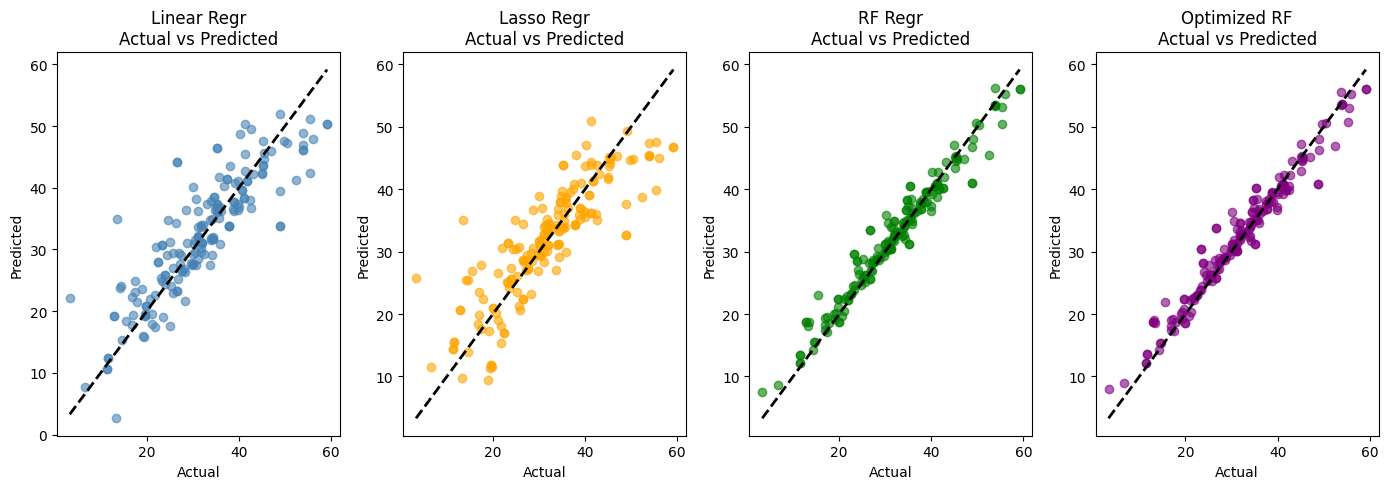

In [79]:
#Step 8: Model Performance Visuals
import matplotlib.pyplot as plt

#8a. Predicting all models
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_lasso = lasso.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)
y_pred_rf_opt = best_rf.predict(X_test_scaled)

plt.figure(figsize=(14, 5))

#8b. Lin Regression Plot
plt.subplot(1, 4, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.6, color="steelblue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("Linear Regr\nActual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")

#8c. Lasso Regression Plot
plt.subplot(1, 4, 2)
plt.scatter(y_test, y_pred_lasso, alpha=0.6, color="orange")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("Lasso Regr\nActual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")

#8d. Random Forest Regression Plot
plt.subplot(1, 4, 3)
plt.scatter(y_test, y_pred_rf, alpha=0.6, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("RF Regr\nActual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")

# 8e. Optimized RF Plot
plt.subplot(1, 4, 4)
plt.scatter(y_test, y_pred_rf_opt, alpha=0.6, color="purple")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("Optimized RF\nActual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.tight_layout()
plt.show()

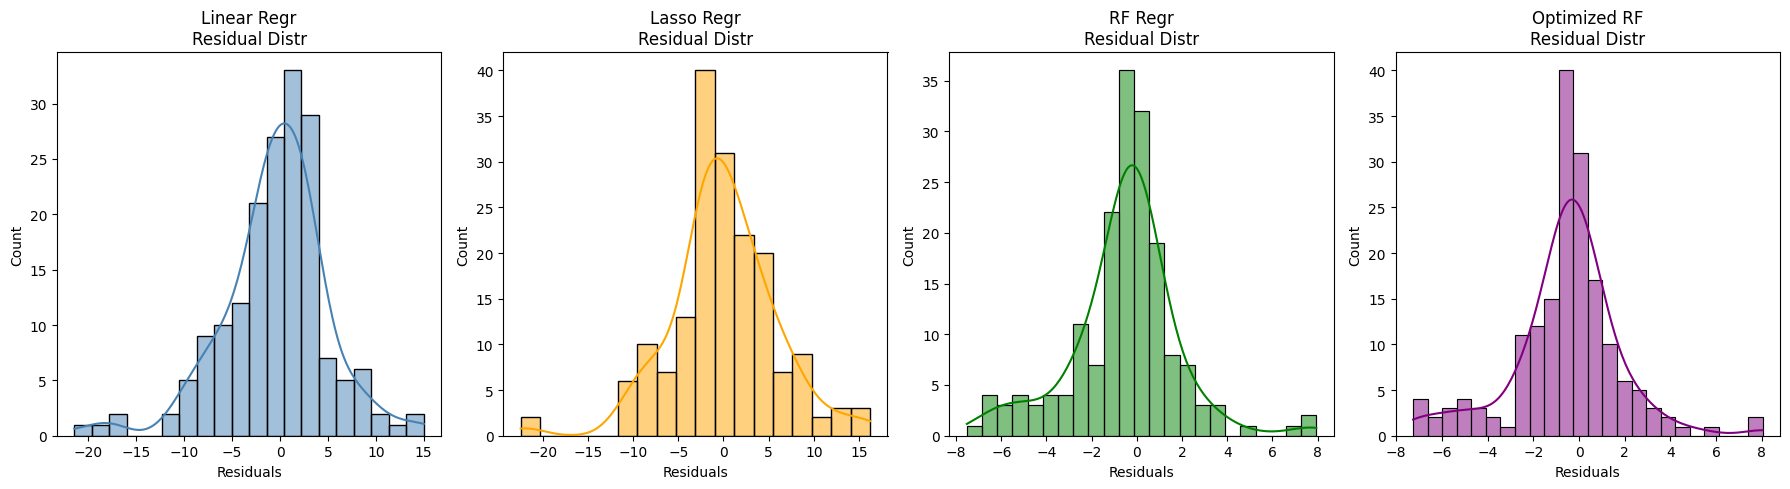

In [81]:
#Step 9: Map Visuals
plt.figure(figsize=(18, 5))
import seaborn as sns

#9a. residuals for all models
res_lr = y_test - y_pred_lr
res_lasso = y_test - y_pred_lasso
res_rf = y_test - y_pred_rf
res_rf_opt = y_test - y_rf_optimized

#9b. Linear Regression Plot
plt.subplot(1, 4, 1)
sns.histplot(res_lr, kde=True, color="steelblue")
plt.title("Linear Regr\nResidual Distr")
plt.xlabel("Residuals")

#9c. Lasso Plot
plt.subplot(1, 4, 2)
sns.histplot(res_lasso, kde=True, color="orange")
plt.title("Lasso Regr\nResidual Distr")
plt.xlabel("Residuals")

#9d. Random Forest Plot
plt.subplot(1, 4, 3)
sns.histplot(res_rf, kde=True, color="green")
plt.title("RF Regr\nResidual Distr")
plt.xlabel("Residuals")

# 9e. Optimized RF Plot
plt.subplot(1, 4, 4)
sns.histplot(res_rf_opt, kde=True, color="purple")
plt.title("Optimized RF\nResidual Distr")
plt.xlabel("Residuals")

plt.tight_layout()
plt.show()

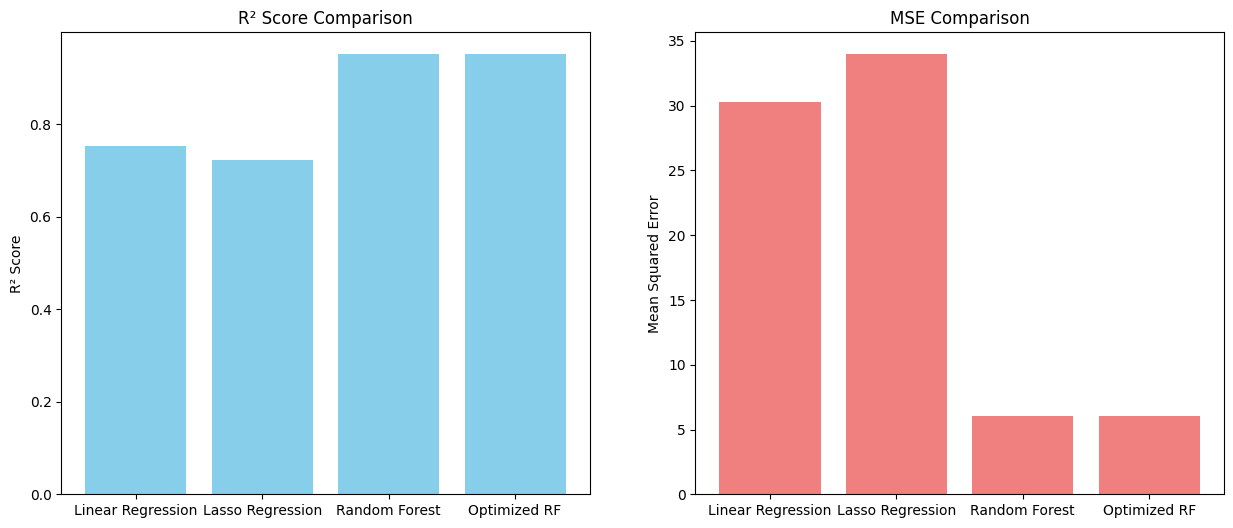

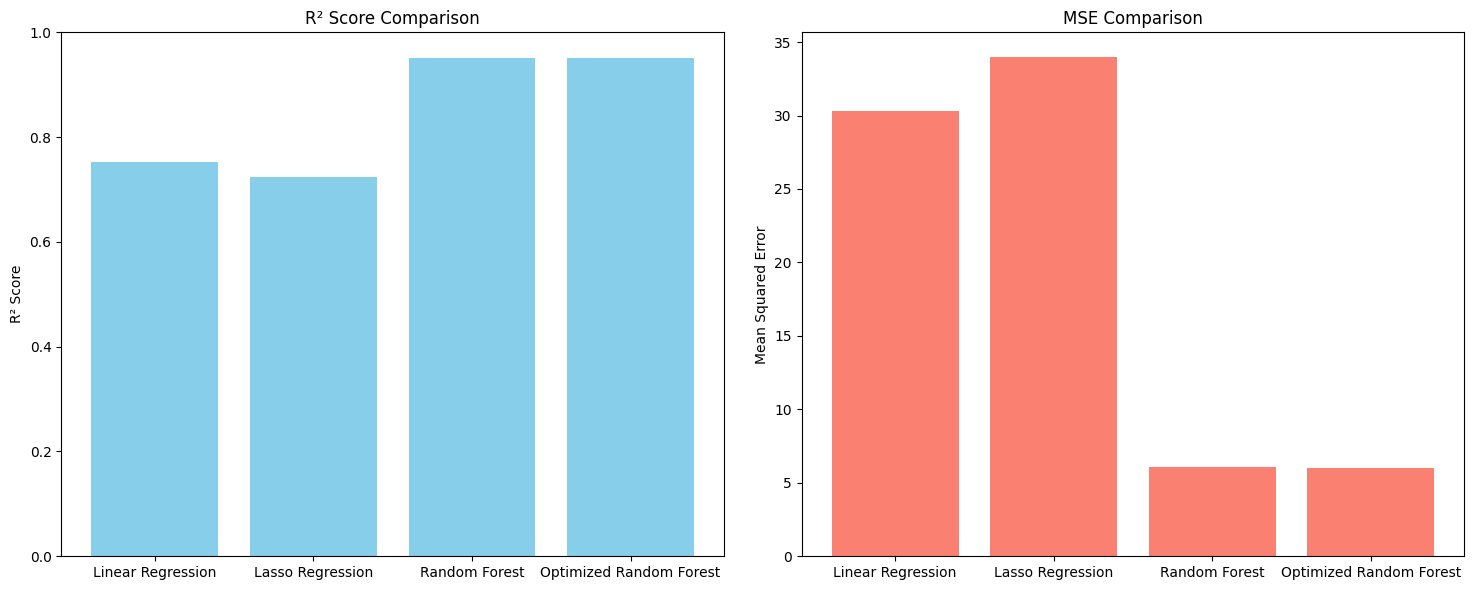

In [82]:
#Step 10: Comparing Model Plots using Rsquare and MSE
#10a. R² scores 
r2_lr = r2_score(y_test, y_pred_lr)
r2_lasso = r2_score(y_test, y_lasso_pred)
r2_rf = r2_score(y_test, y_rf_pred)
r2_rf_opt = r2_score(y_test, y_rf_optimized)

#10b. MSE
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_lasso = mean_squared_error(y_test, y_lasso_pred)
mse_rf = mean_squared_error(y_test, y_rf_pred)
mse_rf_opt = mean_squared_error(y_test, y_rf_optimized)

#10c. DataFrame
import pandas as pd

model_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso Regression', 'Random Forest', 'Optimized RF'],
    'R² Score': [r2_lr, r2_lasso, r2_rf, r2_rf_opt],
    'MSE': [mse_lr, mse_lasso, mse_rf, mse_rf_opt]
})

#10d. comparison bar chart
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

#10e. R² Plot
ax[0].bar(model_comparison['Model'], model_comparison['R² Score'], color='skyblue')
ax[0].set_title("R² Score Comparison")
ax[0].set_ylabel("R² Score")

#10f. MSE Plot
ax[1].bar(model_comparison['Model'], model_comparison['MSE'], color='lightcoral')
ax[1].set_title("MSE Comparison")
ax[1].set_ylabel("Mean Squared Error")

#10g. comparison table
model_comparison = pd.DataFrame({
    'Model': [
        'Linear Regression',
        'Lasso Regression',
        'Random Forest',
        'Optimized Random Forest'
    ],
    'R² Score': [
        r2_lr,
        r2_lasso,
        r2_rf,
        r2_rf_opt
    ],
    'MSE': [
        mse_lr,
        mse_lasso,
        mse_rf,
        mse_rf_opt
    ]
})

# Bar chart comparison
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# R² Score plot
ax[0].bar(model_comparison['Model'], model_comparison['R² Score'], color='skyblue')
ax[0].set_title("R² Score Comparison")
ax[0].set_ylabel("R² Score")
ax[0].set_ylim(0, 1)

# MSE plot
ax[1].bar(model_comparison['Model'], model_comparison['MSE'], color='salmon')
ax[1].set_title("MSE Comparison")
ax[1].set_ylabel("Mean Squared Error")

plt.tight_layout()
plt.show()

**Results of Model Training and Testing**

So far, we cleaned data carefully and prepared data by merging multiple CSV files. We also standardized the features and proceeded to model training using Linear Regression, Lasso Regression, Random Forest Regression, and Optimized Random Forest models. The purpose of this project so far was to evaluate each model’s predictive performance and understand which model best captured the underlying patterns in the data. Below, we explained model comparisons step by step:

First, the linear regression model served as a straightforward baseline assuming a linear relationship between the predictors and the veteran suicide rate. This linear regression model achieved a mean squared error (MSE) of approximately 30.30 and an R² score of 0.75, indicating that it could explain about 75% of the variance in suicide rates among veterans, which is a large effect size. Although results are promising, the linear model is a limited model in capturing complex or nonlinear patterns in the data.

Second, to address potential overfitting and reduce less informative features, we utilized a Lasso regression model with L1 regularization. This Lasso model produced an MSE of 33.96 and an R² score of 0.72. Although the Lasso model was slightly more constrained with reduced variance rate, the regularization penalized some coefficients, which may have weakened its predictive performance slightly compared to the standard linear regression. However, it is still important for simplifying the model by implicitly selecting features.

Third, I used a random forest regression model, which is an ensemble learning approach to aggregate predictions from multiple decision trees that may better handle interactions and nonlinearities. Random forest regression model outperformed the other two by a substantial margin, with an MSE of just 6.05 and an R² score of 0.95. The random forest model’s high accuracy and explanatory power suggest it was well-suited for modeling the complexities of veteran suicide rates using state-level predictors.

Finally, I used a hyperparameter optimization (GridSearchCV via 5-fold cross-validation) to further optimize the random forest regression model. The Optimized model actually further improved performance slightly, with an MSE of 6.01 and an R² score of 0.951, confirming the model’s consistency and reliability across configurations.

Overall, all models provided valuable insights, but the Random Forest, particularly the optimized version, clearly outperformed the others in both accuracy and explanatory power. Its ability to detect nonlinearities and complex feature interactions makes it a strong candidate for practical use in informing public health strategies or policymaking aimed at preventing veteran suicides.

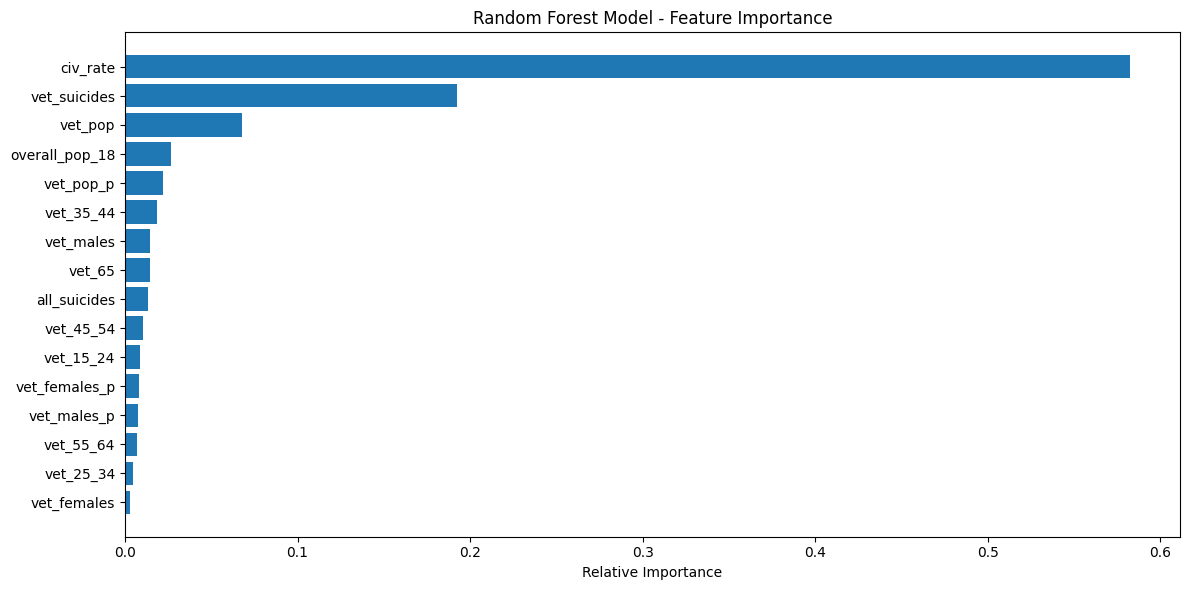

In [83]:
#Step 11: Interpreting Feature Importance
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#11a. feature importances
importances = best_rf.feature_importances_
features = X.columns  # original feature names

#11b. DataFrame
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

#11c. Visual Plot
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title("Random Forest Model - Feature Importance")
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()

**Interpreting Feature Importance Results**

This project explored feature importances derived from the Random Forest Regression which was the best model. This plot helps us better understand the drivers of veteran suicide rates. My results revealed that a small number of features were responsible for the most of predictive power in the Random Forest Regression model.

Interestingly, we found the civilian suicide rate (civ_rate) as the most important and influential feature, recommending a strong contextual relationship between overall suicide trends in a state and those among veterans. This finding also shows that state-level factors, including economic distress and lack of access to mental healthcare services, may influence both civilians and veterans in similar fashion. Overall, we see that when suicide is more prevalent in the general population, it also tends to be more prevalent among veterans.

The raw count of veteran suicides (vet_suicides) was the second most important and influential feature predicting suicide rate, which aligns with previous work since the target variable is suicide rate calculated from such counts. This result shows me the validity of the data and modeling. Besides, results shows that model identifies a logical and highly relevant variables as most important contributors. Finally, my results showed that the total veteran population (vet_pop) and overall adult population (overall_pop_18) also had important influence. This finding explains that these two variables have an important role in identifying the denominator of rate-based outcomes and potentially indicating population-level exposure to stressors.

Interestingly, some important demographic features like suicide counts by veteran gender or specific age groups did not have a strong impact on the model’s predictions, which is somehow not aligning with literature. This could be partially due to high levels of missing data in these variables.

Overall, results suggest so far that some demographic data had some impact on predictive models; however, macro-level factors such those variables with broader state context, are the most powerful predictors of veteran suicide rates in this dataset. This insight can guide future efforts to incorporate social and policy-level indicators into predictive models and inform interventions targeting both veterans and the wider community.

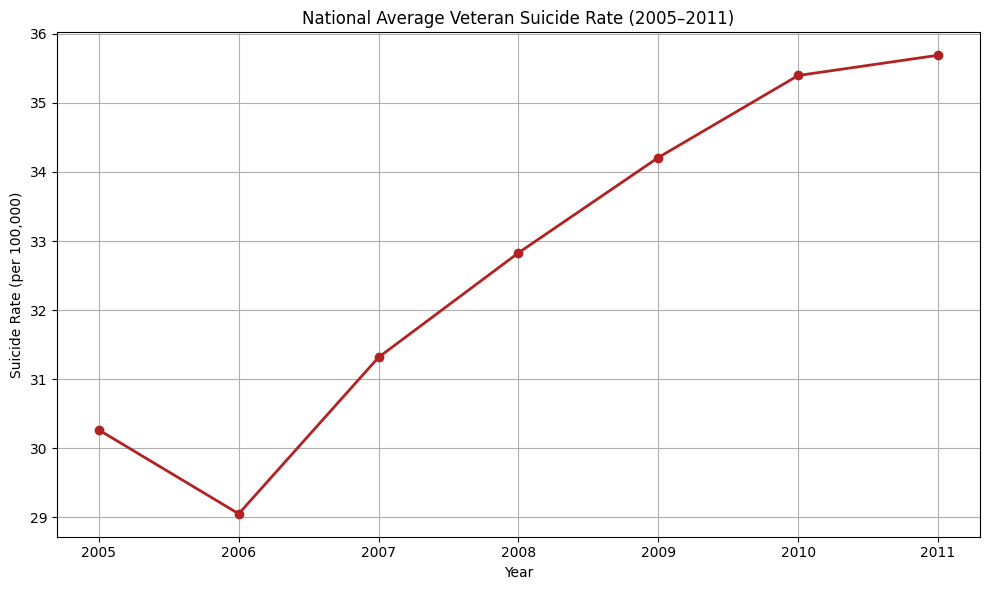

In [53]:
#Step 12: Final Map View of Suicide Rates
#!pip install plotly
import plotly.io as pio
pio.renderers.default = 'notebook'  # or 'iframe'
#12a. veteran suicide rates by state and year
animated_data = nomissing_Data.groupby(['state', 'Year'])['vet_rate'].mean().reset_index()
animated_data['state_abbr'] = animated_data['state'].map(us_state_abbrev)

#12b. animated map
fig = px.choropleth(
    animated_data,
    locations="state_abbr",
    locationmode="USA-states",
    color="vet_rate",
    hover_name="state",
    animation_frame="Year",
    scope="usa",
    color_continuous_scale="Reds",
    title="Veteran Suicide Rates - State and Year (2005–2011)",
    labels={"vet_rate": "Suicide Rate (per 100,000)"}
)

fig.show(renderer="iframe")

#12c. average suicide rate per year
trend_data = nomissing_Data.groupby("Year")["vet_rate"].mean().reset_index()

#12d.  trend line
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(trend_data["Year"], trend_data["vet_rate"], marker="o", linewidth=2, color='firebrick')
plt.title("National Average Suicide Rate among Veterans (2005–2011)")
plt.xlabel("Year")
plt.ylabel("Suicide Rate (per 100,000)")
plt.grid(True)
plt.tight_layout()
plt.show()

**Final Summary and Disclamier** 

**Objective:** The primary purpose of this assignment project was to evaluate and predict suicide rates among U.S. military veterans using publicly available state-level data from 2005 to 2011. I aimed to determine key risk factors contributing to suicide and to explore the performance of multiple supervised learning models in estimating these rates. By understanding the most influential predictors, I hoped to provide insight into potential mental health strategies and policy-level interventions that could mitigate this national crisis.

**Summary of Methods:** My approach started with aggregating and cleaning seven years of veteran suicide data. After removing features with excessive missing values and imputing remaining gaps, I standardized the numerical features and split the data into training and testing sets. Later, I trained four supervised regression models, including Linear Regression, Lasso Regression, Random Forest, and an Optimized Random Forest, and evaluated them using Mean Squared Error (MSE) and R² scores. FInally, I conducted an in-depth exploratory data analysis to understand trends over time, regional disparities, and the relationship between veteran and civilian suicide rates.

**Model Performance:** Among four models run, the optimized Random Forest model achieved the best performance with an R² score of 0.951 and an MSE of 6.01, significantly outperforming both Linear Regression (R² = 0.75) and Lasso Regression (R² = 0.72). This result suggests that the relationship between the predictors and veteran suicide rates is likely nonlinear and complex—well-captured by the ensemble learning method. Results suggested that some demographic data had some impact on predictive models; however, macro-level factors such those variables with broader state context, are the most powerful predictors of veteran suicide rates in this dataset.

**Insights:** The most important predictor of veteran suicide rates was the civilian suicide rate, followed closely by the raw number of veteran suicides, indicating that environmental and social factors affecting the general population also strongly influence veterans. Other notable features included the size of the veteran population and the general adult population. In contrast, gender- and age-specific veteran suicide variables contributed minimally, likely due to data sparsity and missingness.

**Limitations of Data Analysis:** I conducted data analysis using aggregate, state-level data, which limits the ability to draw individual-level conclusions or detect within-state variation. Additionally, many demographic breakdowns contained a large amount of missing data, reducing their utility. Importantly, while the models reveal predictive patterns, they do not imply causation.

**Recommendations and Future Work:** Future research should explore county- or individual-level data to provide more localized and personalized insights. Incorporating additional features like mental illness diagnosis, disability rate, and employment rates, could increase both the accuracy and interpretability of models. 

**Disclaimer:** This work was developed as part of an academic course assignment and is intended solely for educational and demonstration purposes. The analysis, predictions, and interpretations presented here are based on publicly available data and may contain inaccuracies, simplifications, and errors. The results do not represent clinical, policy, or governmental recommendations. The dataset used in this project—“US Veteran Suicides” (2005–2011)—was obtained from Kaggle, which in turn sourced the data from News21, an investigative journalism initiative. The original source of the data is: News21 (2013). “Back Home: The Challenges Facing Post-9/11 Veterans.” Retrieved from https://backhome.news21.com/interactive/suicide-interactive/. I used data to practice course assignment requirements like data formatting and data cleaning for machine learning purposes. The author of this project does not claim responsibility for any decisions made based on the findings herein.

**Reference**

**1.** ResidentMario. (2019). US Veteran Suicides (2005–2011) [Data set]. Kaggle. https://www.kaggle.com/datasets/residentmario/us-veteran-suicides

**2.** Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, E. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, 2825–2830. https://jmlr.org/papers/v12/pedregosa11a.html

**3.** Breiman, L. (2001). Random Forests. Machine Learning, 45(1), 5–32. https://doi.org/10.1023/A:1010933404324

**4.** Tibshirani, R. (1996). Regression shrinkage and selection via the Lasso. Journal of the Royal Statistical Society: Series B (Methodological), 58(1), 267–288. https://doi.org/10.1111/j.2517-6161.1996.tb02080.x

**5.** James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An Introduction to Statistical Learning: With Applications in R. Springer. https://www.statlearning.com/

**6.** Molnar, C. (2022). Interpretable Machine Learning. https://christophm.github.io/interpretable-ml-book/
7. U.S. Department of Veterans Affairs. (2023). 2023 National Veteran Suicide Prevention Annual Report. https://www.mentalhealth.va.gov/suicide_prevention/data.asp

**7.** News21. https://backhome.news21.com/interactive/suicide-interactive/